# Introduction
## What Is Stationarity?
> A stationary time series is a time series where there are no changes in the
underlying system.

- Constant mean (no Trend)
- Constant variance
- Constant autocorrelation structure
- No periodic component (no seasonality)

## What is the Auto Correlation?
Autocorrelation is the correlation between a measurement at two
different times.
>The time interval between values is called the  <b>lag</b>.
- Autocorrelation often results in a pattern, whereas a time series
    without autocorrelation will exhibit randomness.

# Imports

In [29]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

---

# Stationary Time Series


In [30]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

1.0516133069133975

<AxesSubplot:ylabel='Density'>

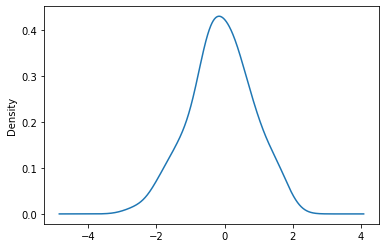

In [31]:
pd.Series(stationary).plot(kind="density")

<AxesSubplot:ylabel='Density'>

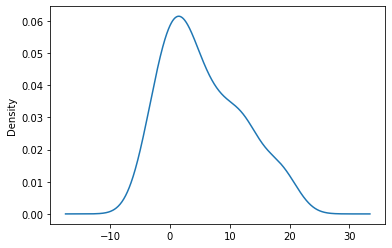

In [32]:
pd.Series(lagged).plot(kind="density")

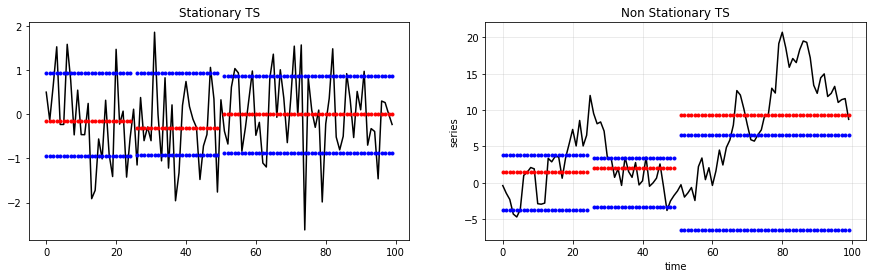

In [64]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(15)

axs[0].plot(time, stationary, 'k-')
#mean
axs[0].plot(time[:25], [np.mean(stationary[:25])]*len(time[:25]),'r.')
axs[0].plot(time[26:50], [np.mean(stationary[26:50])]*len(time[26:50]),'r.')
axs[0].plot(time[51:], [np.mean(stationary[51:])]*len(time[51:]),'r.')
#std
axs[0].plot(time[:25], [np.std(stationary[:25])]*len(time[:25]),'b.')
axs[0].plot(time[26:50], [np.std(stationary[26:50])]*len(time[26:50]),'b.')
axs[0].plot(time[51:], [np.std(stationary[51:])]*len(time[51:]),'b.')

axs[0].plot(time[:25], [-np.std(stationary[:25])]*len(time[:25]),'b.')
axs[0].plot(time[26:50], [-np.std(stationary[26:50])]*len(time[26:50]),'b.')
axs[0].plot(time[51:], [-np.std(stationary[51:])]*len(time[51:]),'b.')

axs[0].set_title("Stationary TS")

axs[1].plot(time, lagged, 'k-')
#mean
axs[1].plot(time[:25], [np.mean(lagged[:25])]*len(time[:25]),'r.')
axs[1].plot(time[26:50], [np.mean(lagged[26:50])]*len(time[26:50]),'r.')
axs[1].plot(time[51:], [np.mean(lagged[51:])]*len(time[51:]),'r.')
#std
axs[1].plot(time[:25], [np.std(lagged[:25])]*len(time[:25]),'b.')
axs[1].plot(time[26:50], [np.std(lagged[26:50])]*len(time[26:50]),'b.')
axs[1].plot(time[51:], [np.std(lagged[51:])]*len(time[51:]),'b.')

axs[1].plot(time[:25], [-np.std(lagged[:25])]*len(time[:25]),'b.')
axs[1].plot(time[26:50], [-np.std(lagged[26:50])]*len(time[26:50]),'b.')
axs[1].plot(time[51:], [-np.std(lagged[51:])]*len(time[51:]),'b.')

axs[1].set_title("Non Stationary TS")

plt.xlabel('time')
plt.ylabel('series')
plt.grid(alpha=0.3);


>- the left panel data has no correlation it is approximatley pure random data
>- the right panel how the last half of data autocorrelated with the firsto one.

### A stationary time series has constant autocorrelation structure throughout the entire series.
- If the autocorrelation remains constant throughout the series, a simple transformation can be used to remove the autocorrelation.


# Identifying Stationarity
1. Run-sequence plots
2. Summary statistics & histogram plots
3. Augmented Dickey-Fuller test

### Run-Sequence Plots
- lets see examples of different non stationary time series

#### Trend

In [83]:
trend = (time * 2.75) + stationary

Text(0.5, 1.0, 'Nonstationary Data w/Trend')

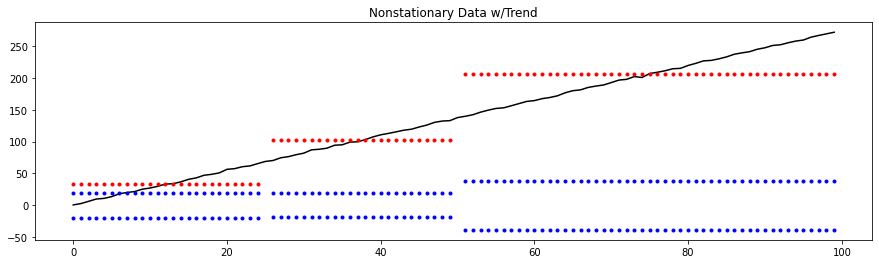

In [84]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

ax.plot(time, trend, 'k-')
#mean
ax.plot(time[:25], [np.mean(trend[:25])]*len(time[:25]),'r.')
ax.plot(time[26:50], [np.mean(trend[26:50])]*len(time[26:50]),'r.')
ax.plot(time[51:], [np.mean(trend[51:])]*len(time[51:]),'r.')
#std
ax.plot(time[:25], [np.std(trend[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [np.std(trend[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [np.std(trend[51:])]*len(time[51:]),'b.')

ax.plot(time[:25], [-np.std(trend[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [-np.std(trend[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [-np.std(trend[51:])]*len(time[51:]),'b.')

ax.set_title("Nonstationary Data w/Trend")

#### Heteroscedasticity

In [85]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

Text(0.5, 1.0, 'Nonstationary Data w/Heteroscedasticity')

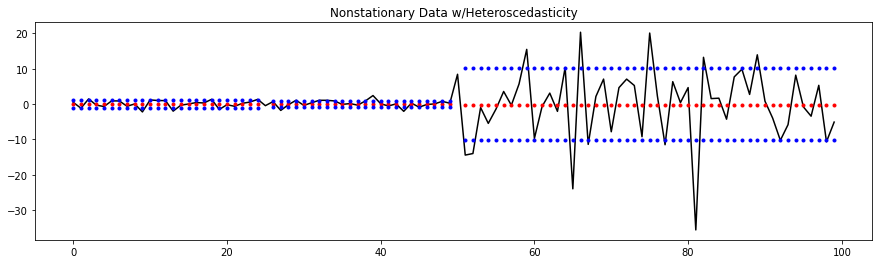

In [86]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

ax.plot(time, heteroscedasticity, 'k-')
#mean
ax.plot(time[:25], [np.mean(heteroscedasticity[:25])]*len(time[:25]),'r.')
ax.plot(time[26:50], [np.mean(heteroscedasticity[26:50])]*len(time[26:50]),'r.')
ax.plot(time[51:], [np.mean(heteroscedasticity[51:])]*len(time[51:]),'r.')
#std
ax.plot(time[:25], [np.std(heteroscedasticity[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [np.std(heteroscedasticity[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [np.std(heteroscedasticity[51:])]*len(time[51:]),'b.')

ax.plot(time[:25], [-np.std(heteroscedasticity[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [-np.std(heteroscedasticity[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [-np.std(heteroscedasticity[51:])]*len(time[51:]),'b.')

ax.set_title("Nonstationary Data w/Heteroscedasticity")

#### Seasonality

In [87]:
seasonality = 10 + np.sin(time) * 10

Text(0.5, 1.0, 'Nonstationary Data w/Seasonality')

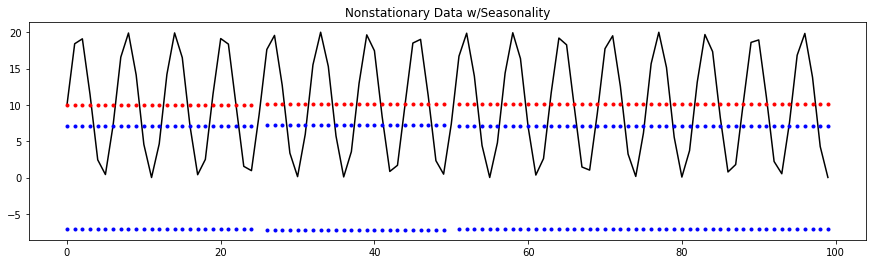

In [88]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

ax.plot(time, seasonality, 'k-')
#mean
ax.plot(time[:25], [np.mean(seasonality[:25])]*len(time[:25]),'r.')
ax.plot(time[26:50], [np.mean(seasonality[26:50])]*len(time[26:50]),'r.')
ax.plot(time[51:], [np.mean(seasonality[51:])]*len(time[51:]),'r.')
#std
ax.plot(time[:25], [np.std(seasonality[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [np.std(seasonality[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [np.std(seasonality[51:])]*len(time[51:]),'b.')

ax.plot(time[:25], [-np.std(seasonality[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [-np.std(seasonality[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [-np.std(seasonality[51:])]*len(time[51:]),'b.')

ax.set_title("Nonstationary Data w/Seasonality")

#### Trend + Seasonality

In [89]:
trend_seasonality = trend + seasonality + stationary

Text(0.5, 1.0, 'Nonstationary Data w/Trend and Seasonality')

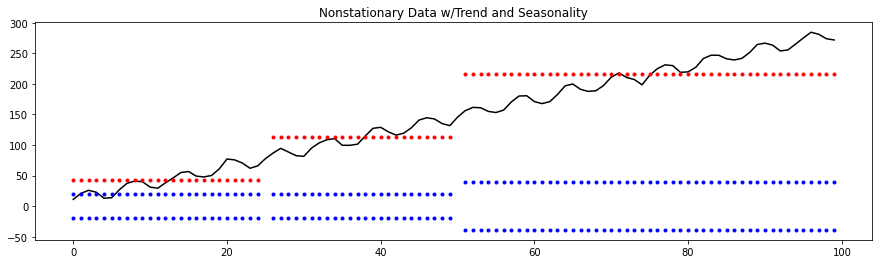

In [90]:
fig, ax = plt.subplots()
fig.set_figwidth(15)

ax.plot(time, trend_seasonality, 'k-')
#mean
ax.plot(time[:25], [np.mean(trend_seasonality[:25])]*len(time[:25]),'r.')
ax.plot(time[26:50], [np.mean(trend_seasonality[26:50])]*len(time[26:50]),'r.')
ax.plot(time[51:], [np.mean(trend_seasonality[51:])]*len(time[51:]),'r.')
#std
ax.plot(time[:25], [np.std(trend_seasonality[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [np.std(trend_seasonality[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [np.std(trend_seasonality[51:])]*len(time[51:]),'b.')

ax.plot(time[:25], [-np.std(trend_seasonality[:25])]*len(time[:25]),'b.')
ax.plot(time[26:50], [-np.std(trend_seasonality[26:50])]*len(time[26:50]),'b.')
ax.plot(time[51:], [-np.std(trend_seasonality[51:])]*len(time[51:]),'b.')

ax.set_title("Nonstationary Data w/Trend and Seasonality")

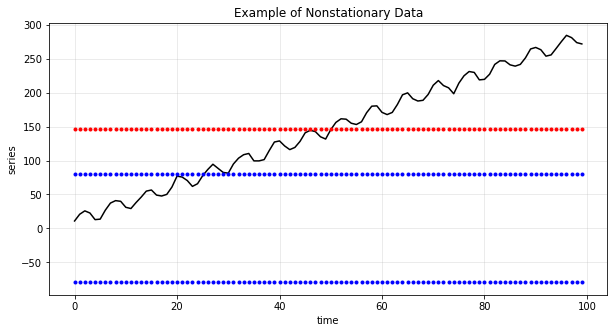

In [91]:
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

### Summary Statistics & Plots

In [92]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [93]:
chunks[0].size

10

#### Summary Stats

In [94]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


#### Numpy way :)!
There's a nice shortcut method in NumPy to get the same results without having to run through a for loop. 

In [97]:
np.mean(chunks, axis=1)

array([ 12.82306111,  39.08434177,  67.15315644,  94.56489333,
       122.12217783, 150.07444143, 177.35994301, 204.82726388,
       232.47644743, 259.72580861])

In [98]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

#### Explanation

While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary. 

> Note: We do expect some fluctuation in values. It's highly unlikely that the either the mean or variace will be exactly the same from chunk to chunk, but it should be close. 

#### Histogram Plot

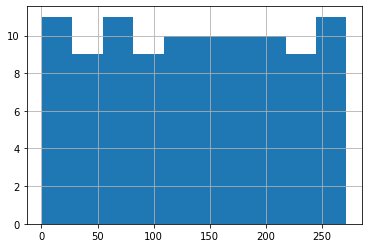

In [99]:
pd.Series(trend).hist();

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant. It's certainly not definitive but gives you a good indication. 

Here we see what appears to be a uniform distribution. As we would expect for time series with trend, this data is not stationary and the histogram plot provides insight into that fact.

Let's try the same thing on the *stationary* data we created way back at the beginning. 

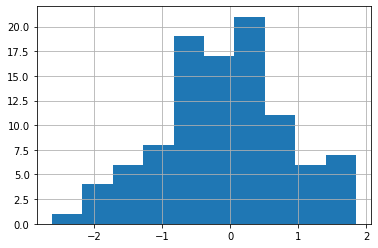

In [100]:
pd.Series(stationary).hist();

That definitely looks more approximately Normal. 

We could use SciPy's [normaltest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html) to check whether this sample differs from a Normal distribution.

### Augmented Dickey-Fuller Test
This is a statistical procedure to suss out whether a time series is stationary or not.
what you need to know:
1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null. 
> The value 0.05 is common but depends upons numerous factors.

Let's see how to run this test in Python.

#### Stationary Data & ADF

In [106]:
from statsmodels.tsa.stattools import adfuller, kpss

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

A brief discussion about the important outputs from the ADF test is in order. 

In [103]:
print(adf)

1.1655044784188669e-17


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the **pvalue** should.

In [54]:
print(pvalue)

1.1655044784188669e-17


Next, **pvalue** is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here **pvalue** is very close to zero (~$10^{-17}$) so we reject the null that this data is nonstationary.

In [55]:
print(nobs)

99


The variable **nobs** is simply the number of observations in the time series, in this case 99.

In [56]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


Finally, the **critical_values** variable provides test statistic threholds for common significant levels. Here we see a test statistic of roughly -2.89 and lower is sufficient to reject the null using a significance level of 5%.

> You may have noticed two outputs we didn't discuss. See [statsmodels docs](http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for a description of **usedlag** and **icbest**.

#### Trend Data & ADF
Now to run the ADF test on the *trend* data. 

In [104]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  0.33188731231643864
p-value: 0.9787610787258315


#### Lagged Data & ADF
As expected, we fail to reject the null that the trend data is in fact nonstationary. Success!

Let's run the same test on the *lagged* data.

In [105]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -1.8975904890519302
p-value: 0.3331954683868472


You may find this a surprising result as ADF says the series is nonstationary. Even though the series does have constant autocorrelation, it is not yet in a form that is techincally statinoary. Therefore, we'll learn in the next section how to apply said transformation to accomplish just that.

#### The Good News 
You now have several tools in your toolkit to help you figure out if a given time series is stationary or not.

### KPSS test
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

**Null Hypothesis**: The process is trend stationary.

**Alternate Hypothesis**: The series has a unit root (series is not stationary).



In [109]:
kpss_test,pvalue,usedlag, critical_values = kpss(stationary)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [110]:
pvalue

0.1

##### pvalue > 0.05 so we can not reject null hypothesis the data is stationary :)!

[How to determin stationarity using both test](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html?highlight=kpss)
- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

# Common Nonstationary-to-Stationary Transformations

### Example #1: Remove Trend & Seasonality with Statsmodels

Let's run the ADF test before transforming.

In [119]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.2940360592889386
p-value:  0.9770692037868645


In [119]:
def run_sequence_plot(time, data, title,xlabel='time',ylabel='series'):
    plt.figure(figsize=(10,5))
    plt.plot(time,data,'k-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

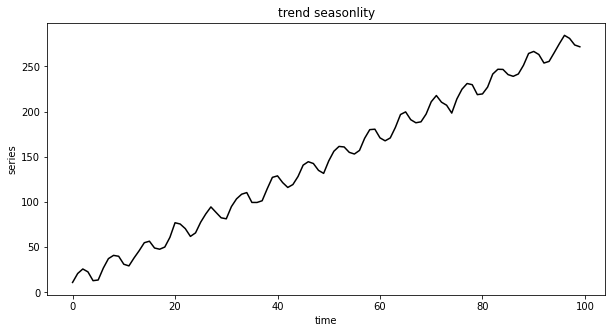

In [120]:
run_sequence_plot(time, trend_seasonality, title="trend seasonlity")

Nonstationary as we expect. Time for a transformation.

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid


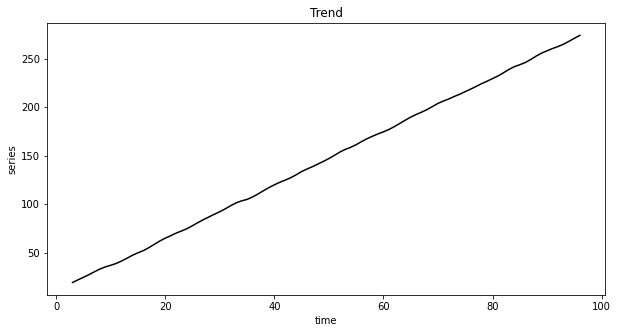

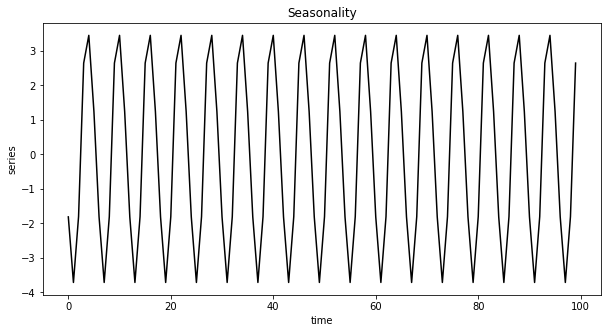

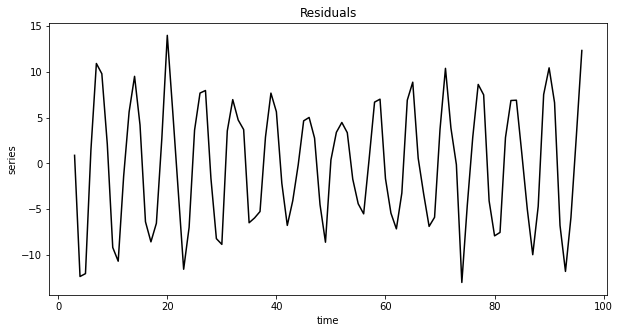

In [122]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

Let's take a quick peek at the residual values.

In [123]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

We'll have to remove the first and last three values to run an ADF test since those values are all **nan**. Here's how to do that and run the test all in one call.

In [124]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -5.672045394689414
p-value:  8.876265981116426e-07


Now it's stationary!

### Example 2: Remove Changing Variance w/Log Transformation
This trick works well when you're dealing with heteroscedastic data. Let's plot that again to remind you what that looks like.

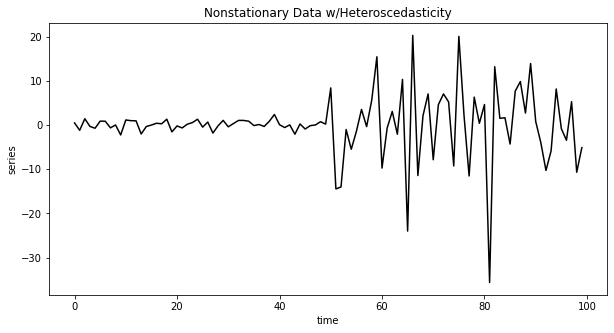

In [125]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the plot shows two clearly different variance levels, one with small variance at the left and another with larger variance to the right?

Let's run the ADF test.

In [126]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

ADF:  -5.462617806964473
p-value:  2.4990147402545993e-06
Critical Values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


In [129]:
kpss_b4, pvalue_b4, usedlag_, critical_values_ = kpss(heteroscedasticity, nlags='auto', regression='c')
print("KPSS: ", kpss_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

KPSS:  0.03476382778410381
p-value:  0.1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


ADF and KPSS is saying we reject the null that this series is nonstationary. However, the plot clearly shows that the variance is not constant with time. 
#### Log Transformation

We can apply a log transformation. However, we cannot take the log of nonpositive values. The way we can get around this is by adding a constant to all values to make them positive. 

Let's take a look. 

In [130]:
new_hetero = heteroscedasticity + 38

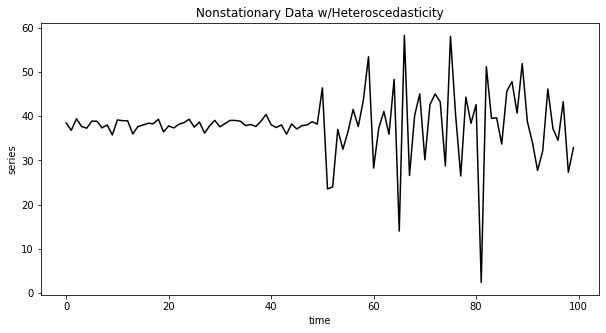

In [131]:
run_sequence_plot(time, new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Now every value is positive and we can apply the log transformation.

In [132]:
log_new_hetero = np.log(new_hetero)

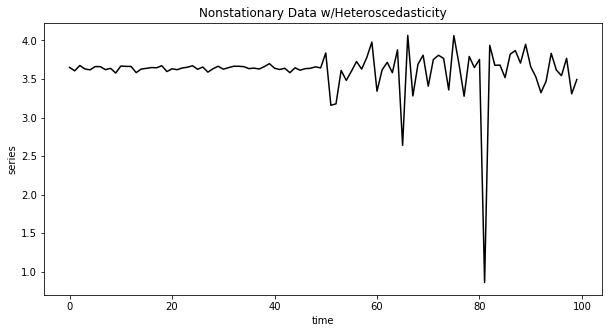

In [133]:
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the variance has collapsed to a large extent. 

Let's view the ADF and KPSS test statistics again.

In [136]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
kpss_after, pvalue_after, usedlag_, critical_values_ = kpss(log_new_hetero, nlags='auto', regression='c')
print("KPSS: ", kpss_after)
print("p-value: ", kpss_after)

ADF:  -11.988221715202044
p-value:  3.5714555887959506e-22
KPSS:  0.15563829708070884
p-value:  0.15563829708070884


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


The big takeaway here is that the test confirms a greater confidence in the log transformed time series being stationary.

### Example 3: Removing Autocorrelation with Differencing
We know *lagged* was created with a lag of one. So let's subtract $O_{t-1}$ from $O_{t}$ where $O_{t}$ is the observed data at time *t* and $O_{t-1}$ is the observed data at *t-1*.

In [137]:
difference = lagged[:-1] - lagged[1:]

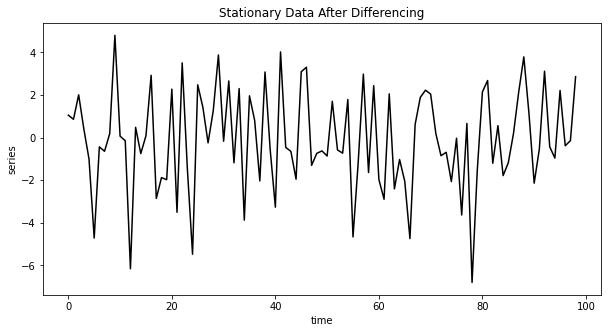

In [138]:
run_sequence_plot(time[:-1], difference,
                  title="Stationary Data After Differencing")

Let's run ADF one more time, this time on the differenced data.

In [140]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
kpss_after, pvalue_after, usedlag_, critical_values_ = kpss(difference, nlags='auto', regression='c')
print("KPSS: ", kpss_after)
print("p-value: ", kpss_after)

ADF:  -10.80998293972917
p-value:  1.9196947925176003e-19
KPSS:  0.06282654677967522
p-value:  0.06282654677967522


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


It's stationary!

A key question that should be on the top of your mind right now is how do you know if your data has autocorrelation and how do you decide what lag to use when differencing?